In [ ]:
1.	Загрузите датасеты классификации из библиотеки skikit-learn - load_wine

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target

In [ ]:
2.	Изучите данные

In [23]:
print(wine.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])


In [24]:

print("Data:")
print(wine.data[:5]) 
print("\nFeature Names:")
print(wine.feature_names) 

print("\nTarget Names:")
print(wine.target_names) 

print("\nDescription:")
print(wine.DESCR[:500])  

Data:
[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]

Feature Names:
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Target Names:
['class_0' 'class_1' 'class_2']

Description:
.. _wine_dataset:

Wine recogni

In [ ]:
3.	Разделите данные на обучающий и тестовые наборы

In [36]:
X = wine_df.drop('target', axis=1)
y = wine_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=66)

In [ ]:
4.	Исследуйте данные с помощью визуализации. Подберите нужные параметры графиков

C:\Users\mephi\AppData\Local\Temp\ipykernel_46716\616714669.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=wine_df, palette='viridis')


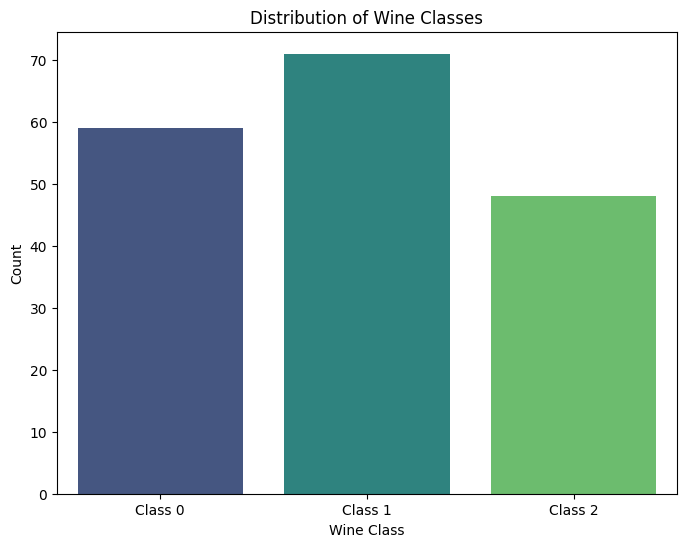

<Figure size 1200x1000 with 0 Axes>

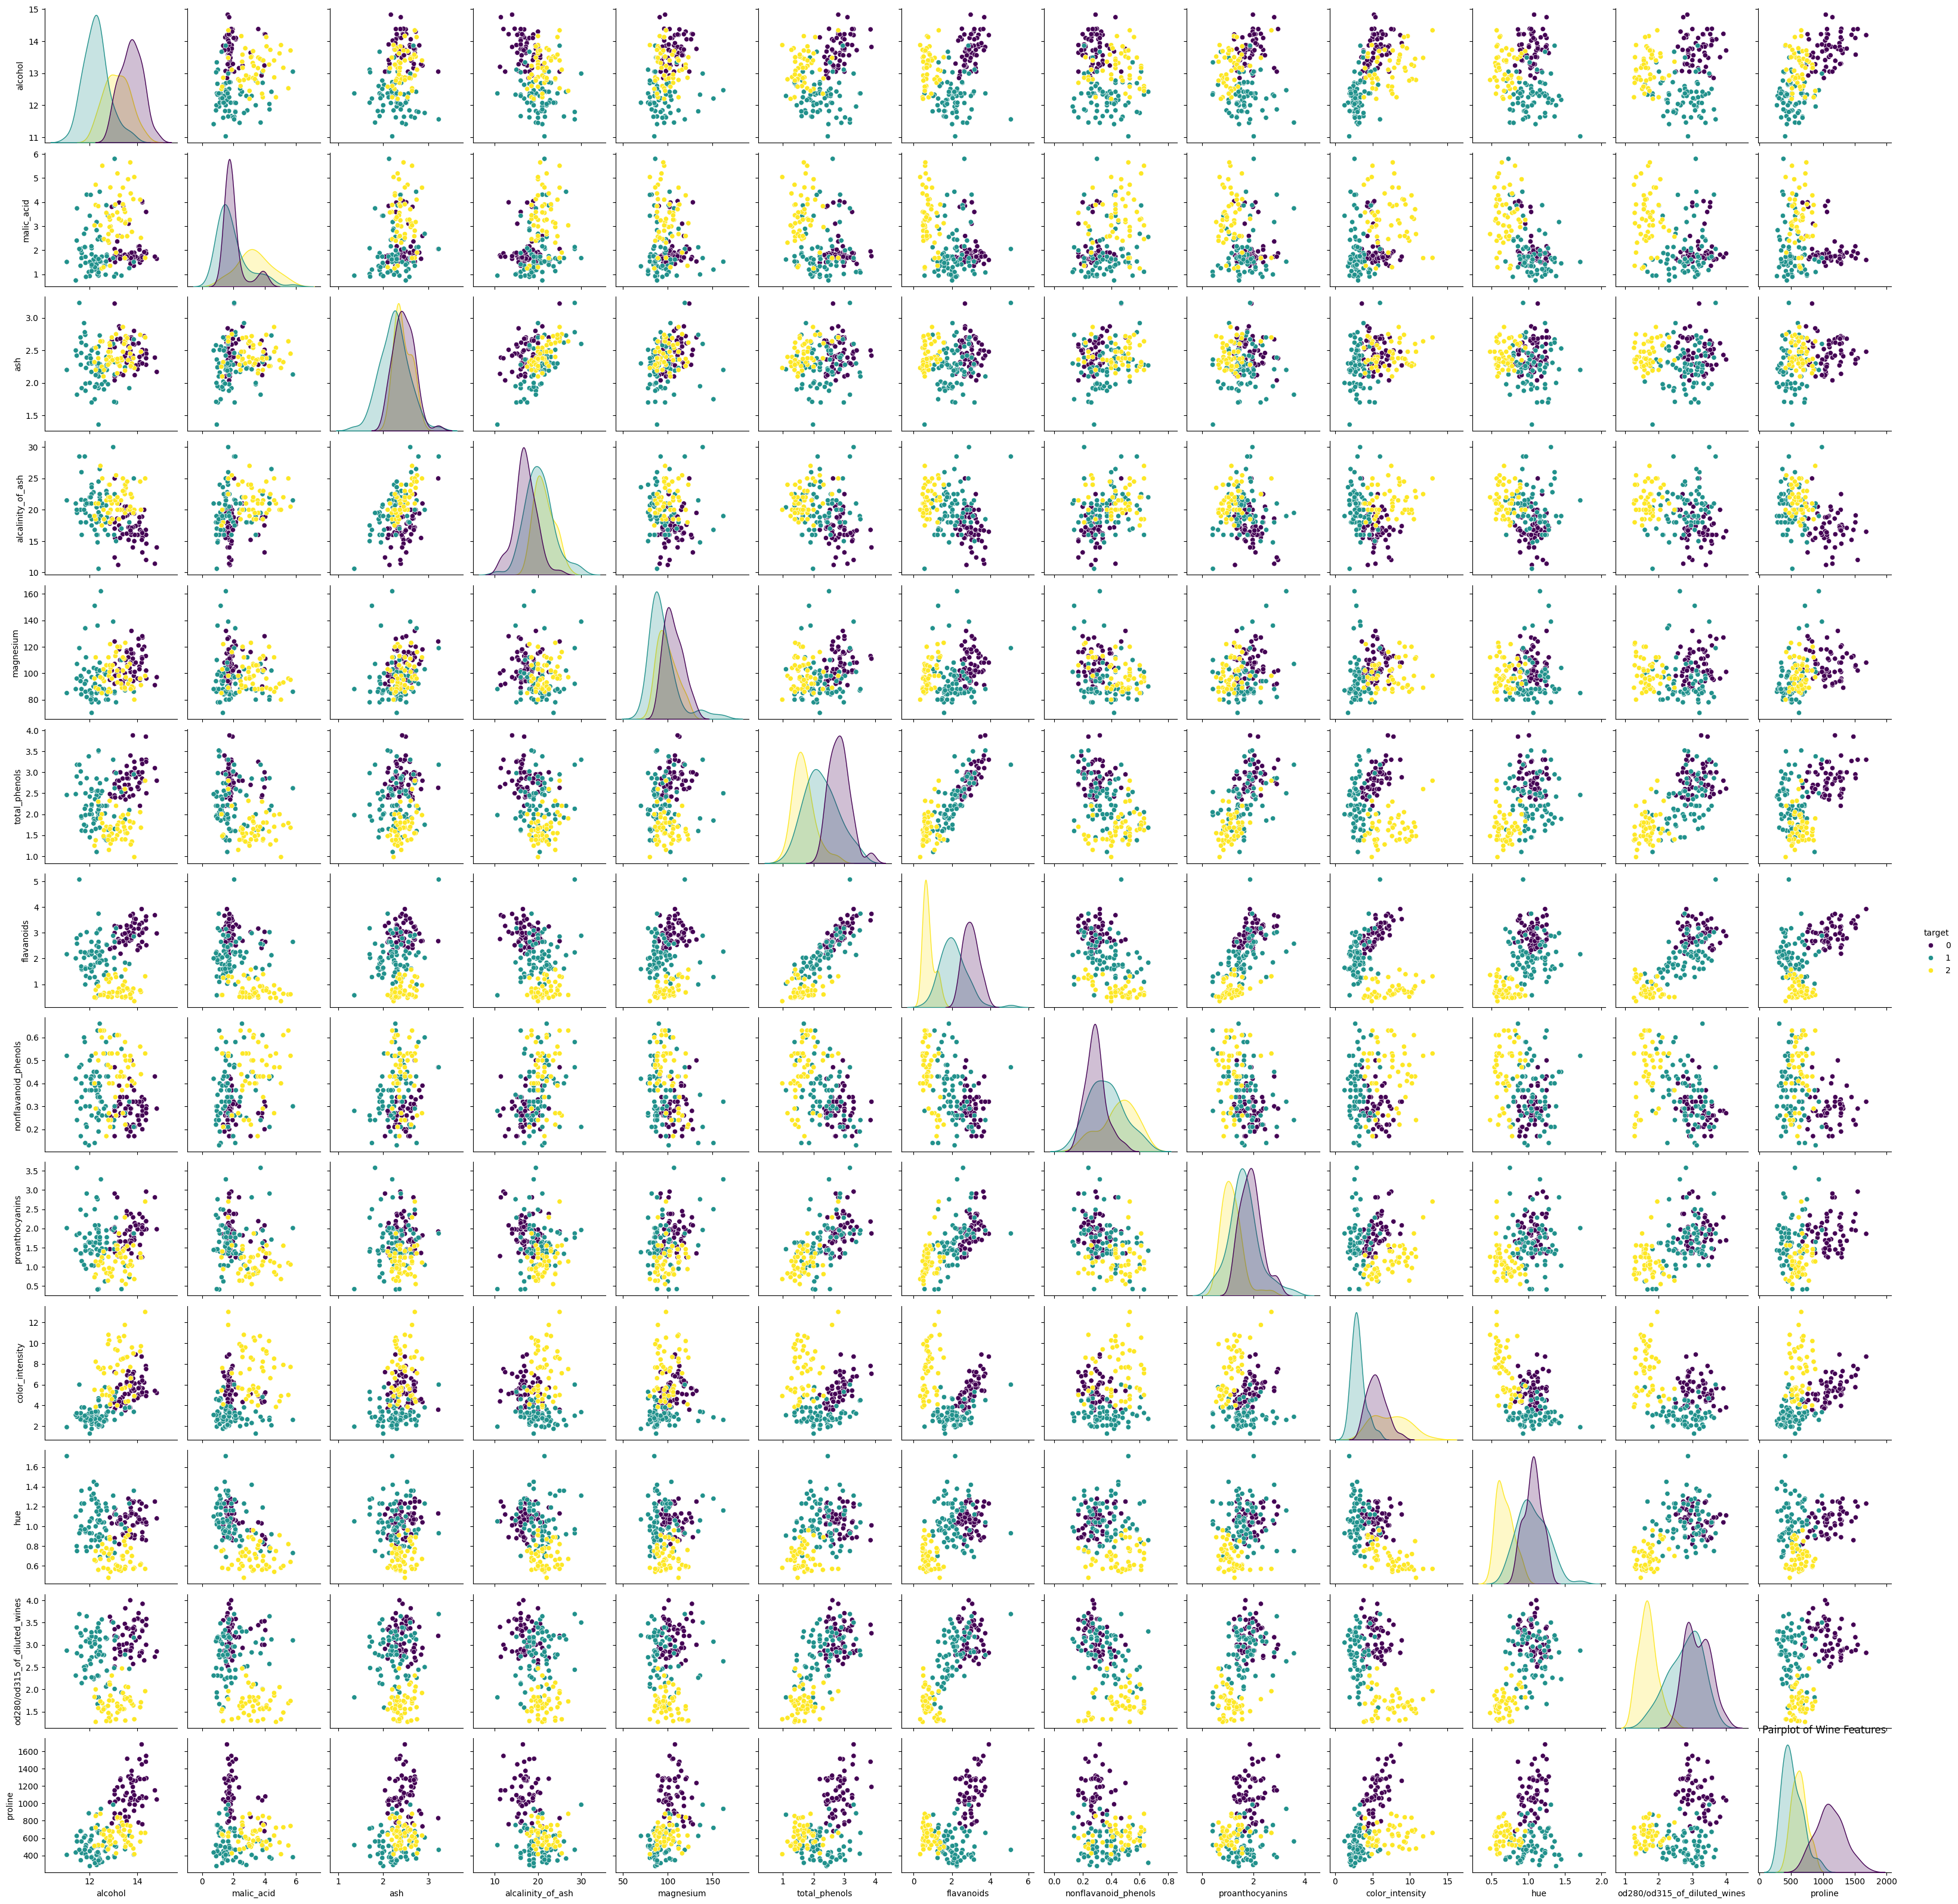

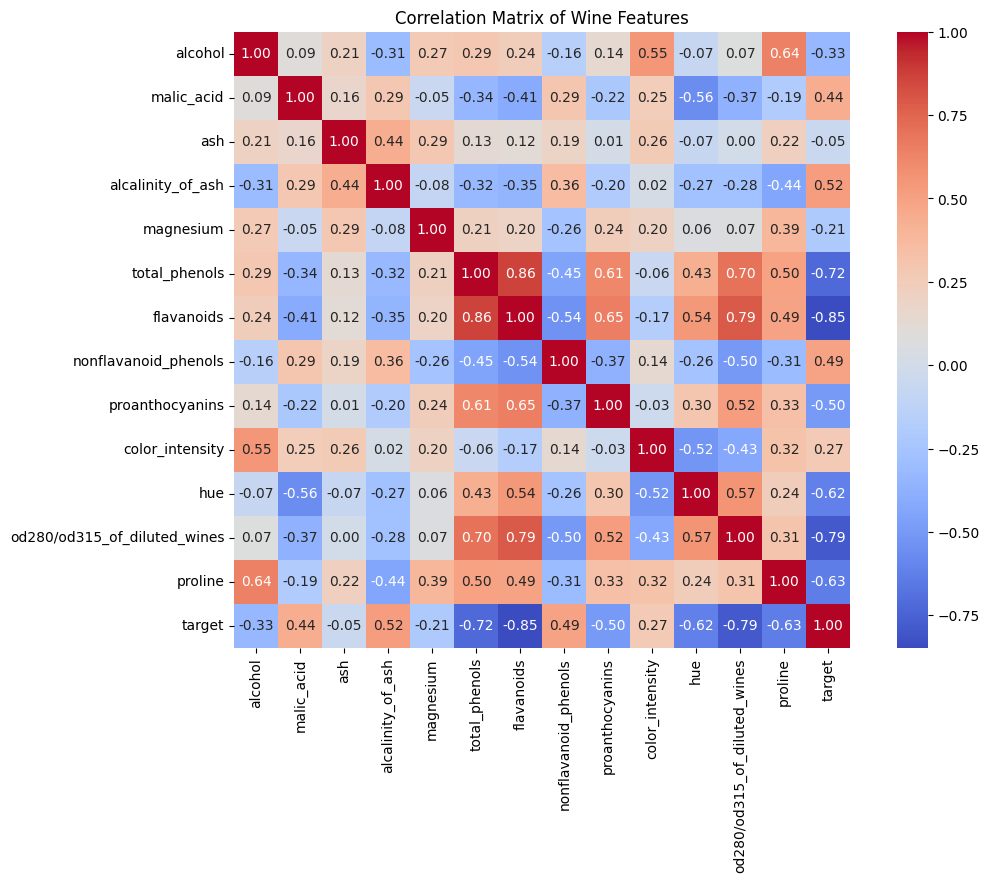

In [37]:


plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=wine_df, palette='viridis')
plt.title('Distribution of Wine Classes')
plt.xlabel('Wine Class')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['Class 0', 'Class 1', 'Class 2'])
plt.show()

plt.figure(figsize=(12, 10))
sns.pairplot(wine_df, hue='target', palette='viridis')
plt.title('Pairplot of Wine Features')
plt.show()

plt.figure(figsize=(12, 8))
correlation_matrix = wine_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Matrix of Wine Features')
plt.show()

In [ ]:
5.	Постройте модель по методу k-ближайших средних. Протестируйте на произвольном наборе данных

In [38]:
knn = KNeighborsClassifier(n_neighbors=5)  # Выбор k=5
knn.fit(X_train, y_train)

random_data = np.random.uniform(low=X.min(), high=X.max(), size=(1, X.shape[1]))
predicted_class = knn.predict(random_data)

print(f'Random data: {random_data}')
print(f'Predicted class for random data: {predicted_class[0]}')

Random data: [[1.43578821e+01 2.86081230e+00 1.95010893e+00 1.51311317e+01
  1.17579910e+02 1.44508804e+00 2.78125379e+00 3.87329396e-01
  9.59755677e-01 7.17926051e+00 1.58057539e+00 2.58164044e+00
  1.04314678e+03]]
Predicted class for random data: 0


C:\Users\mephi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
6.	Получите прогноз модели

In [39]:
y_pred = knn.predict(X_test)



In [ ]:
7.	Оцените качество модели

In [40]:
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy on test set: {accuracy:.2f}')

Accuracy on test set: 0.71


In [ ]:
Вывод:
Точность модели k-ближайших соседей в 0.71 указывает на умеренную эффективность в классификации вин.
Это значение ниже ожидаемого для таких наборов данных 